In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from   torch import nn

##### 准备数据

In [2]:
data = pd.read_csv("./dataset/Income1.csv") #读取数据集

In [3]:
X    = torch.from_numpy(data.Education.values.reshape(-1,1).astype(np.float32))
Y    = torch.from_numpy(data.Income.values.reshape(-1,1).astype(np.float32))

##### 创建模型

In [4]:
model   = nn.Linear(1,1) # 创建输入参数为1个 输出参数为1个 的线性模型 即 output = w*input + b
                         # 注意，在torch中w b是被当做矩阵来计算的 ;预测结果output = w*input + b等价于model(input)

In [5]:
loss_fn = nn.MSELoss()   # 定义均方误差损失函数对象

In [6]:
opt     = torch.optim.SGD(model.parameters(),lr=0.0001) # 定义优化器，采用随机梯度下降算法，参数分别为模型需要求导的参数对象，lr指定学习速率

#### 训练模型

In [7]:
for epoch in range(50):          # epoch代表一次训练周期  每周期训练5000次
    for x,y in zip(X,Y):           # 并行迭代
        y_pred = model(x)          # 使用模型求解预测值
        loss   = loss_fn(y,y_pred) # 根据预测结果求解MSE
        
                                   # 反向传播求解权重的梯度
        opt.zero_grad()            # 将梯度清零，避免上一次计算的结果影响本次优化
        loss.backward()            # 求解梯度
        
        opt.step()                 # 优化模型参数

In [8]:
model.weight # 得到模型权重

Parameter containing:
tensor([[3.4101]], requires_grad=True)

In [9]:
model.bias #得到模型偏置

Parameter containing:
tensor([0.5164], requires_grad=True)

##### 得出结果

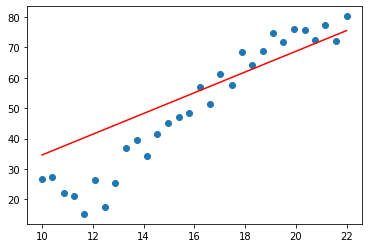

In [10]:
plt.scatter(data.Education,data.Income)
plt.plot(X.numpy(),model(X).data.numpy(),color="red") 